In [142]:
import pandas as pd

In [143]:
target = pd.read_excel('./data/Financial_Market/NYSE_closing_price.xlsx')

In [144]:
sentNA = pd.read_csv('./data/News_AI_Sentiments/daily-news-sentiment-NA.csv')

In [145]:
sentINT = pd.read_csv('./data/News_AI_Sentiments/daily-news-sentiment-international.csv')

In [146]:
#preview
target.head()

,Value,Date,Super Region,Ticker,Time Level,Source,Stock Name,Sub-Sector,Stock Attribute,Currency,Data Provider,Stock Exchange,Location
0,36.67,2020-08-07,GLOBAL DATA,MPC,DAILY,WORLDDATA.AI,MARATHON PETROLEUM CORPORATION,GLOBAL STOCK EXCHANGE DATA,CLOSING PRICE,USD,NEW YORK STOCK EXCHANGE,NEW YORK STOCK EXCHANGE - STOCK PRICES,AMERICA-NEW_YORK
1,67.68,2018-03-07,GLOBAL DATA,MPC,DAILY,WORLDDATA.AI,MARATHON PETROLEUM CORPORATION,GLOBAL STOCK EXCHANGE DATA,CLOSING PRICE,USD,NEW YORK STOCK EXCHANGE,NEW YORK STOCK EXCHANGE - STOCK PRICES,AMERICA-NEW_YORK
2,46.23,2021-01-25,GLOBAL DATA,MPC,DAILY,WORLDDATA.AI,MARATHON PETROLEUM CORPORATION,GLOBAL STOCK EXCHANGE DATA,CLOSING PRICE,USD,NEW YORK STOCK EXCHANGE,NEW YORK STOCK EXCHANGE - STOCK PRICES,AMERICA-NEW_YORK
3,35.73,2020-08-06,GLOBAL DATA,MPC,DAILY,WORLDDATA.AI,MARATHON PETROLEUM CORPORATION,GLOBAL STOCK EXCHANGE DATA,CLOSING PRICE,USD,NEW YORK STOCK EXCHANGE,NEW YORK STOCK EXCHANGE - STOCK PRICES,AMERICA-NEW_YORK
4,67.39,2018-03-06,GLOBAL DATA,MPC,DAILY,WORLDDATA.AI,MARATHON PETROLEUM CORPORATION,GLOBAL STOCK EXCHANGE DATA,CLOSING PRICE,USD,NEW YORK STOCK EXCHANGE,NEW YORK STOCK EXCHANGE - STOCK PRICES,AMERICA-NEW_YORK


In [147]:
target['Stock Name'].value_counts()

MARATHON OIL CORPORATION             1000
CONOCOPHILLIPS                       1000
PIONEER NATURAL RESOURCES COMPANY    1000
EXXON MOBIL CORPORATION              1000
OCCIDENTAL PETROLEUM CORPORATION     1000
PHILLIPS 66                          1000
VALERO ENERGY CORPORATION            1000
BP P.L.C.                            1000
CHEVRON CORPORATION                  1000
MARATHON PETROLEUM CORPORATION       1000
Name: Stock Name, dtype: int64

In [148]:
target.dtypes

Value              float64
Date                object
Super Region        object
Ticker              object
Time Level          object
Source              object
Stock Name          object
Sub-Sector          object
Stock Attribute     object
Currency            object
Data Provider       object
Stock Exchange      object
Location            object
dtype: object

In [149]:
target['Date'] = pd.to_datetime(target['Date'])

In [150]:
target.dtypes

Value                     float64
Date               datetime64[ns]
Super Region               object
Ticker                     object
Time Level                 object
Source                     object
Stock Name                 object
Sub-Sector                 object
Stock Attribute            object
Currency                   object
Data Provider              object
Stock Exchange             object
Location                   object
dtype: object

In [151]:
#keep only Exxon prices
target = target[target['Stock Name'] == 'EXXON MOBIL CORPORATION'].copy()

In [152]:
target.shape

(1000, 13)

In [153]:
target.columns

Index(['Value', 'Date', 'Super Region', 'Ticker', 'Time Level', 'Source',
       'Stock Name', 'Sub-Sector', 'Stock Attribute', 'Currency',
       'Data Provider', 'Stock Exchange', 'Location'],
      dtype='object')

In [154]:
target['Date'].value_counts() #confirming only a single date now for each row

2017-10-30    1
2017-08-31    1
2020-07-14    1
2018-04-02    1
2018-04-16    1
             ..
2019-11-04    1
2019-06-04    1
2017-08-16    1
2020-11-25    1
2020-02-11    1
Name: Date, Length: 1000, dtype: int64

In [155]:
exxon = target[['Date', 'Value']]

In [156]:
exxon.reset_index(inplace=True)

In [157]:
exxon = exxon[['Date', 'Value']].copy()

In [158]:
exxon

,Date,Value
0,2020-08-07,43.44
1,2018-03-07,74.26
2,2021-01-25,46.90
3,2020-08-06,43.64
4,2018-03-06,76.18
...,...,...
995,2019-07-05,76.13
996,2019-07-08,76.48
997,2018-07-20,81.40
998,2019-07-09,76.43


In [159]:
exxon = exxon.sort_values(by='Date') #range of dates

In [160]:
exxon.reset_index(inplace=True) #match index numbers to order of dates
exxon = exxon[['Date', 'Value']].copy()
exxon

,Date,Value
0,2017-02-28,81.32
1,2017-03-01,83.02
2,2017-03-02,83.30
3,2017-03-03,82.46
4,2017-03-06,82.83
...,...,...
995,2021-02-19,52.37
996,2021-02-22,54.30
997,2021-02-23,55.05
998,2021-02-24,56.70


In [161]:
sentINT.head() #preview

,DateTime,Daily News Sentiment
0,4/17/2000 0:00,-0.1
1,8/1/2000 0:00,0.2
2,1/24/2001 0:00,0.2
3,4/4/2001 0:00,-0.1
4,10/31/2002 0:00,-0.5


In [162]:
sentINT.dtypes

DateTime                 object
Daily News Sentiment    float64
dtype: object

In [163]:
sentINT['DateTime'] = pd.to_datetime(sentINT['DateTime'])

In [164]:
sentINT.dtypes

DateTime                datetime64[ns]
Daily News Sentiment           float64
dtype: object

In [165]:
sentINT.sort_values(by='DateTime') #preview

,DateTime,Daily News Sentiment
0,2000-04-17,-0.10
1,2000-08-01,0.20
2,2001-01-24,0.20
3,2001-04-04,-0.10
4,2002-10-31,-0.50
...,...,...
390,2021-02-23,-0.27
391,2021-02-24,-0.10
392,2021-02-25,0.00
393,2021-02-26,-0.30


In [166]:
sentINT = sentINT.sort_values(by='DateTime') #make permanent

In [167]:
sentINT

,DateTime,Daily News Sentiment
0,2000-04-17,-0.10
1,2000-08-01,0.20
2,2001-01-24,0.20
3,2001-04-04,-0.10
4,2002-10-31,-0.50
...,...,...
390,2021-02-23,-0.27
391,2021-02-24,-0.10
392,2021-02-25,0.00
393,2021-02-26,-0.30


In [168]:
sentNA.head() #preview

,DateTime,Daily News Sentiment
0,7/26/2013 0:00,0.1
1,8/1/2013 0:00,-0.5
2,8/8/2013 0:00,0.1
3,8/9/2013 0:00,0.1
4,8/17/2013 0:00,0.2


In [169]:
sentNA['DateTime'] = pd.to_datetime(sentNA['DateTime']) #perform same changes as on INT df
sentNA = sentNA.sort_values(by='DateTime') 

In [170]:
sentNA #preview

,DateTime,Daily News Sentiment
0,2013-07-26,0.10
1,2013-08-01,-0.50
2,2013-08-08,0.10
3,2013-08-09,0.10
4,2013-08-17,0.20
...,...,...
391,2021-02-23,-0.50
392,2021-02-24,-0.50
393,2021-02-25,0.07
394,2021-02-26,-0.40


Need to join all 3 dfs together in order to run models predicting close price. (join on date)

In [171]:
exxon = exxon.set_index(keys='Date')
exxon

,Value
Date,
2017-02-28,81.32
2017-03-01,83.02
2017-03-02,83.30
2017-03-03,82.46
2017-03-06,82.83
...,...
2021-02-19,52.37
2021-02-22,54.30
2021-02-23,55.05


In [172]:
sentINT = sentINT.set_index(keys='DateTime')

In [173]:
sentINT #preview

,Daily News Sentiment
DateTime,
2000-04-17,-0.10
2000-08-01,0.20
2001-01-24,0.20
2001-04-04,-0.10
2002-10-31,-0.50
...,...
2021-02-23,-0.27
2021-02-24,-0.10
2021-02-25,0.00


In [174]:
sentNA = sentNA.set_index(keys='DateTime')
sentNA #preview

,Daily News Sentiment
DateTime,
2013-07-26,0.10
2013-08-01,-0.50
2013-08-08,0.10
2013-08-09,0.10
2013-08-17,0.20
...,...
2021-02-23,-0.50
2021-02-24,-0.50
2021-02-25,0.07


Dates are now set as indexes, making the join easier

In [175]:
all_sent = sentINT.join(sentNA, how='outer', lsuffix = '_INT', rsuffix = '_NA') #join both sentiment dfs

In [176]:
all_sent #preview

,Daily News Sentiment_INT,Daily News Sentiment_NA
DateTime,,
2000-04-17,-0.10,NaN
2000-08-01,0.20,NaN
2001-01-24,0.20,NaN
2001-04-04,-0.10,NaN
2002-10-31,-0.50,NaN
...,...,...
2021-02-23,-0.27,-0.50
2021-02-24,-0.10,-0.50
2021-02-25,0.00,0.07


In [178]:
all_sent.isnull().sum()

Daily News Sentiment_INT    281
Daily News Sentiment_NA     280
dtype: int64

In [177]:
all_sent.tail(20)

,Daily News Sentiment_INT,Daily News Sentiment_NA
DateTime,,
2021-01-29,-0.50,-0.05
2021-01-30,0.02,NaN
2021-02-01,NaN,-0.23
2021-02-02,-0.22,-0.30
2021-02-03,-0.15,-0.18
2021-02-06,NaN,0.10
2021-02-09,-0.27,NaN
2021-02-10,0.20,-0.10
2021-02-12,-0.10,NaN


In [182]:
df = exxon.join(all_sent)

In [183]:
df.isnull().sum()

Value                         0
Daily News Sentiment_INT    782
Daily News Sentiment_NA     780
dtype: int64

For simplicity in this first crude model, I will use "0" to fill the null values in news sentiment - it's not unreasonable to say that on days in which 'Exxon' did not appear in the news, sentiment towards it was neither positive nor negative, i.e. zero.

In [184]:
df.fillna(0, inplace=True)

In [187]:
df #preview

,Value,Daily News Sentiment_INT,Daily News Sentiment_NA
Date,,,
2017-02-28,81.32,0.00,0.00
2017-03-01,83.02,0.00,0.00
2017-03-02,83.30,0.00,-0.20
2017-03-03,82.46,0.00,0.00
2017-03-06,82.83,-0.20,-0.20
...,...,...,...
2021-02-19,52.37,0.00,0.00
2021-02-22,54.30,0.00,0.00
2021-02-23,55.05,-0.27,-0.50


In [188]:
#df.to_csv('exxon_sentiment_clean.csv')

In [190]:
df

,Value,Daily News Sentiment_INT,Daily News Sentiment_NA
Date,,,
2017-02-28,81.32,0.00,0.00
2017-03-01,83.02,0.00,0.00
2017-03-02,83.30,0.00,-0.20
2017-03-03,82.46,0.00,0.00
2017-03-06,82.83,-0.20,-0.20
...,...,...,...
2021-02-19,52.37,0.00,0.00
2021-02-22,54.30,0.00,0.00
2021-02-23,55.05,-0.27,-0.50


In [191]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score

In [193]:
X = df[['Daily News Sentiment_INT', 'Daily News Sentiment_NA']]
y = df['Value']

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=False)

In [195]:
print(
X_train.shape,
y_train.shape,
X_test.shape,
y_test.shape)

(750, 2) (750,) (250, 2) (250,)


In [204]:
X_train

,Daily News Sentiment_INT,Daily News Sentiment_NA
Date,,
2017-02-28,0.0,0.0
2017-03-01,0.0,0.0
2017-03-02,0.0,-0.2
2017-03-03,0.0,0.0
2017-03-06,-0.2,-0.2
...,...,...
2020-02-13,0.0,-0.2
2020-02-14,0.0,0.0
2020-02-18,0.0,0.0


In [205]:
X_test

,Daily News Sentiment_INT,Daily News Sentiment_NA
Date,,
2020-02-21,0.00,0.00
2020-02-24,0.10,0.00
2020-02-25,0.00,0.00
2020-02-26,0.00,0.00
2020-02-27,0.00,0.00
...,...,...
2021-02-19,0.00,0.00
2021-02-22,0.00,0.00
2021-02-23,-0.27,-0.50


In [212]:
y_train

Date
2017-02-28    81.32
2017-03-01    83.02
2017-03-02    83.30
2017-03-03    82.46
2017-03-06    82.83
              ...  
2020-02-13    60.93
2020-02-14    60.65
2020-02-18    59.88
2020-02-19    60.34
2020-02-20    59.86
Name: Value, Length: 750, dtype: float64

In [213]:
y_test

Date
2020-02-21    59.13
2020-02-24    56.36
2020-02-25    54.20
2020-02-26    53.01
2020-02-27    49.82
              ...  
2021-02-19    52.37
2021-02-22    54.30
2021-02-23    55.05
2021-02-24    56.70
2021-02-25    55.76
Name: Value, Length: 250, dtype: float64

In [198]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [201]:
preds = model.predict(X_test)

In [202]:
from matplotlib import pyplot as plt

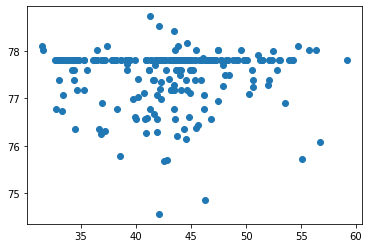

In [206]:
plt.scatter(y_test, preds)

In [211]:
model.score(X_test, y_test)

-35.91062017132094

In [218]:
#https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-one/

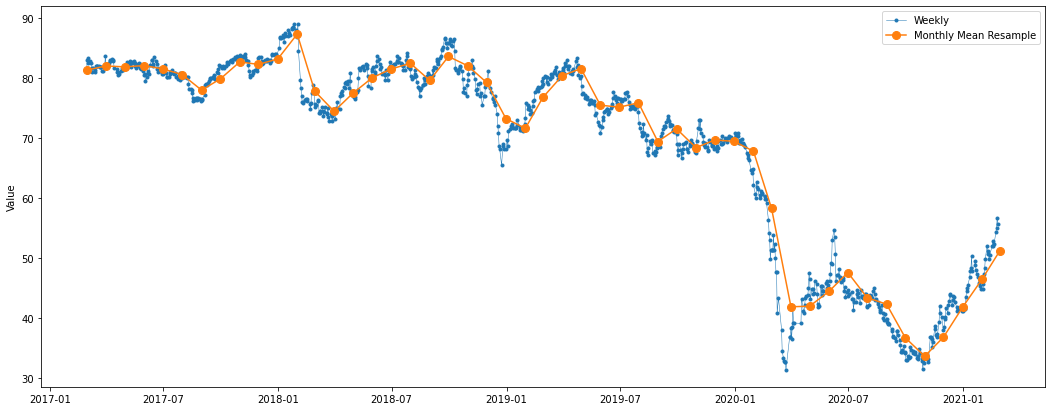

In [217]:
y = df['Value']
fig, ax = plt.subplots(figsize=(18, 7))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Value')
ax.legend();

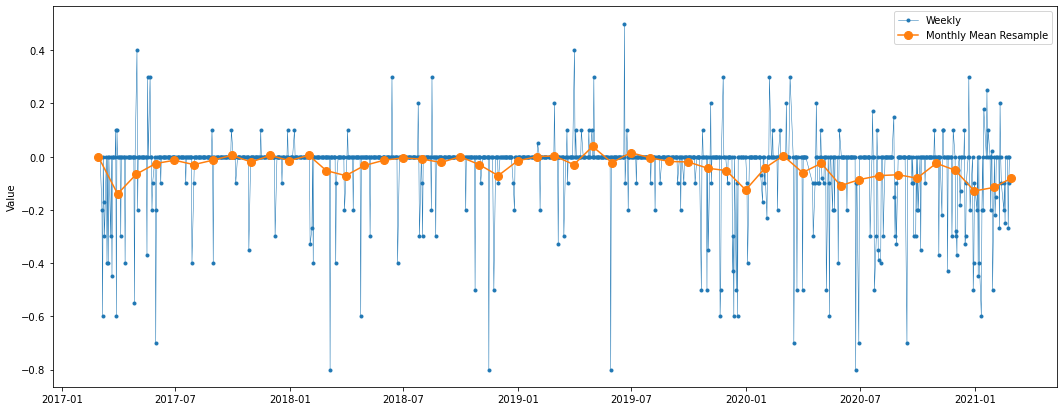

In [219]:
y = df['Daily News Sentiment_INT']
fig, ax = plt.subplots(figsize=(18, 7))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Value')
ax.legend();

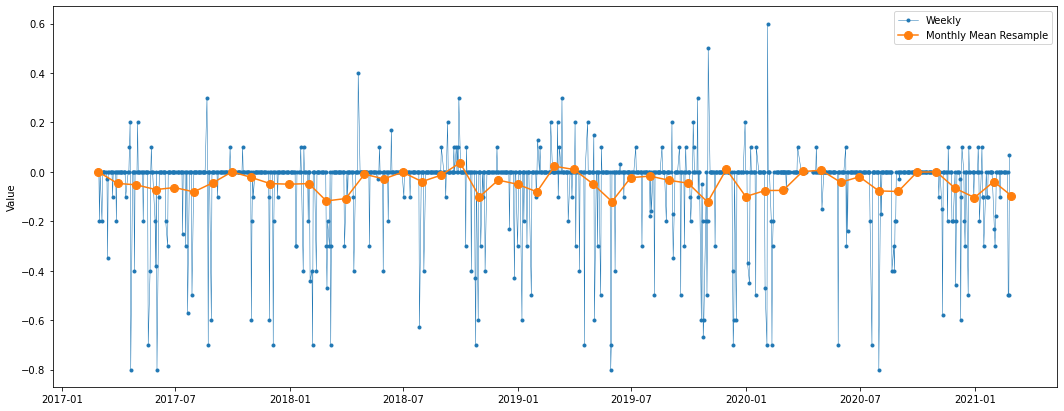

In [220]:
y = df['Daily News Sentiment_NA']
fig, ax = plt.subplots(figsize=(18, 7))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Value')
ax.legend();